# Analiza košarkarskih podatkov

Za projektno nalogo bom analiziral podatke, ki sem jih pridobil iz spletne strani [Basketball Reference](https://www.basketball-reference.com/), natančneje podatke iz tabele, ki prikazuje statistiko vsakega igralca v sezoni 2023/24, tako redni del sezone kot končnica.

Z uporabo različnih metod bom raziskal, kako se nekatere kategorije košarkarskih podatkov med seboj povezujejo in odražajo v igri.

In [1]:
#naložimo potrebne pakete za obdelavo podatkov
import pandas as pd
import matplotlib.pyplot as plt

# uvozimo datoteko, kjer imamo podatke igralcev
redni_del = pd.read_csv("redni_del_sezone.csv")
koncnica = pd.read_csv("koncnica.csv")

## Redni del sezone

Za začetek si poglejmo redni del sezone. Naša tabela zaenkrat izgleda tako:

In [2]:
redni_del

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,"MVP-3,CPOY-6,AS,NBA1"
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,"MVP-4,DPOY-9,CPOY-12,AS,NBA1"
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,"MVP-2,DPOY-7,CPOY-3,AS,NBA1"
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,"MVP-5,CPOY-5,AS,NBA2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Ron Harper Jr.,23.0,TOR,PF,1.0,0.0,4.0,0.0,0.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN
732,Justin Jackson,28.0,MIN,SF,2.0,0.0,0.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
733,Dmytro Skapintsev,25.0,NYK,C,2.0,0.0,1.0,0.0,0.5,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
734,Javonte Smart,24.0,PHI,PG,1.0,0.0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Ker imamo veliko kategorij podatkov, jih bomo nekaj izbrisali, da bo tabela preglednejša. Izbrisali bomo stolpce, ki označujejo podatke za odigrane tekme v prvi postavi, zadeti meti za dve točki, število poskusov metov za dve točki, procentna uspešnost zadetih metov za dve točki, eFG%, število prostih metov, število izvedenih prostih metov, skoki v napadu, skoki v obrambi in nagrade. 
Opomba: večina podatkov je beležena kot povprečje na tekmo.

In [3]:
redni_del = redni_del.drop(columns=["GS", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "ORB", "DRB", "Awards"])
redni_del

,Player,Age,Team,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,33.6,11.5,21.8,0.529,1.4,3.6,0.388,0.883,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,0.786,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,35.2,11.5,18.8,0.611,0.5,1.7,0.274,0.657,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,0.874,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,35.4,10.3,21.4,0.479,2.7,6.8,0.401,0.847,3.6,6.7,0.9,0.2,2.4,1.9,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Ron Harper Jr.,23.0,TOR,PF,1.0,4.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,0.0
732,Justin Jackson,28.0,MIN,SF,2.0,0.5,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,Dmytro Skapintsev,25.0,NYK,C,2.0,1.0,0.0,0.5,0.000,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
734,Javonte Smart,24.0,PHI,PG,1.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# izbrišimo zadnjo vrstico, ki označuje League average
redni_del = redni_del.drop(redni_del.index[-1])

V tabeli so nekateri igralci zapisani večkrat, ker so v sezoni zaigrali za dve ali pa celo tri ekipe. Poiščimo te igralce in preuredimo tabelo tako,
da bodo vsi igralci zapisani samo enkrat.

In [5]:
twoteams_players = redni_del[redni_del["Team"] == "2TM"]
twoteams_players

,Player,Age,Team,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
37,Pascal Siakam,29.0,2TM,PF,80.0,33.2,8.5,15.9,0.536,1.1,3.1,0.346,0.732,7.1,4.3,0.8,0.3,1.8,2.4,21.7
48,RJ Barrett,23.0,2TM,SG,58.0,31.7,7.5,15.2,0.495,1.6,4.3,0.360,0.715,5.4,3.3,0.5,0.4,2.2,2.2,20.2
55,Terry Rozier,29.0,2TM,SG,61.0,33.4,7.2,16.4,0.443,2.4,6.7,0.363,0.869,4.0,5.6,1.0,0.3,1.7,1.7,19.8
79,Immanuel Quickley,24.0,2TM,SG,68.0,29.2,5.7,13.1,0.434,2.5,6.4,0.395,0.853,3.8,4.9,0.7,0.1,1.5,1.8,17.0
100,Bojan Bogdanović,34.0,2TM,PF,57.0,25.9,5.4,11.9,0.454,2.3,5.9,0.398,0.785,2.7,1.7,0.5,0.1,1.8,1.7,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Ish Wainright,29.0,2TM,SF,11.0,5.6,0.6,2.2,0.292,0.6,1.8,0.350,1.000,1.3,0.1,0.4,0.1,0.2,0.7,2.1
650,Mamadi Diakite,27.0,2TM,PF,6.0,4.0,0.7,1.0,0.667,0.0,0.2,0.000,0.667,0.7,0.3,0.2,0.2,0.2,0.3,2.0
666,Taj Gibson,38.0,2TM,PF,20.0,10.2,0.8,1.9,0.405,0.1,0.5,0.200,1.000,1.9,0.6,0.2,0.4,0.3,1.6,1.7
669,P.J. Tucker,38.0,2TM,PF,31.0,15.7,0.6,1.6,0.360,0.4,1.1,0.371,1.000,2.7,0.5,0.5,0.2,0.3,1.7,1.7


In [6]:
threeteams_players = redni_del[redni_del["Team"] == "3TM"]
threeteams_players

,Player,Age,Team,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
386,Danilo Gallinari,35.0,3TM,SF,49.0,12.9,1.7,3.9,0.437,0.6,1.9,0.323,0.857,2.2,1.1,0.3,0.1,0.5,1.0,5.7
396,Malachi Flynn,25.0,3TM,PG,69.0,12.7,2.0,4.7,0.418,0.8,2.4,0.331,0.732,1.7,1.9,0.6,0.1,0.9,1.0,5.5
458,Kenneth Lofton Jr.,21.0,3TM,PF,21.0,9.5,1.7,3.7,0.462,0.3,1.1,0.292,0.654,1.8,1.6,0.3,0.2,0.7,1.1,4.6
465,Shake Milton,27.0,3TM,SG,48.0,12.1,1.6,4.1,0.405,0.4,1.3,0.281,0.816,1.6,1.3,0.4,0.1,0.6,1.1,4.5
579,Kira Lewis Jr.,22.0,3TM,PG,28.0,9.5,1.2,3.3,0.370,0.1,1.2,0.121,0.850,0.9,1.3,0.3,0.1,0.5,0.5,3.2
592,Mike Muscala,32.0,3TM,C,53.0,11.3,1.1,2.9,0.359,0.5,1.8,0.292,0.680,2.4,0.7,0.2,0.2,0.4,1.0,3.0
615,Dylan Windler,27.0,3TM,SF,17.0,6.4,0.9,1.8,0.500,0.8,1.6,0.481,NaN,0.9,0.6,0.1,0.0,0.1,0.4,2.5


In [7]:
# koliko igralcev je sezono igralo samo za eno ekipo
singleteam_players = redni_del.drop_duplicates(subset=['Player'], keep=False)
stevilo_singleteam_players = len(singleteam_players)
stevilo_singleteam_players

494

In [8]:
# prečiščena tabela, vsak igralec zapisan samo enkrat
redni_del = pd.concat([singleteam_players, twoteams_players, threeteams_players])
redni_del

,Player,Age,Team,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,33.6,11.5,21.8,0.529,1.4,3.6,0.388,0.883,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,0.786,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,35.2,11.5,18.8,0.611,0.5,1.7,0.274,0.657,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,0.874,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,35.4,10.3,21.4,0.479,2.7,6.8,0.401,0.847,3.6,6.7,0.9,0.2,2.4,1.9,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Kenneth Lofton Jr.,21.0,3TM,PF,21.0,9.5,1.7,3.7,0.462,0.3,1.1,0.292,0.654,1.8,1.6,0.3,0.2,0.7,1.1,4.6
465,Shake Milton,27.0,3TM,SG,48.0,12.1,1.6,4.1,0.405,0.4,1.3,0.281,0.816,1.6,1.3,0.4,0.1,0.6,1.1,4.5
579,Kira Lewis Jr.,22.0,3TM,PG,28.0,9.5,1.2,3.3,0.370,0.1,1.2,0.121,0.850,0.9,1.3,0.3,0.1,0.5,0.5,3.2
592,Mike Muscala,32.0,3TM,C,53.0,11.3,1.1,2.9,0.359,0.5,1.8,0.292,0.680,2.4,0.7,0.2,0.2,0.4,1.0,3.0


V tabeli najdemo igralce, ki imajo med svojimi podatki dokaj veliko ničelnih kategorij ali pa so odigrali majhno število tekem oziroma so dobili nizko stopnjo minutaže.
Za nadaljno analizo izločimo igralce, ki so odigrali manj kot 5 tekem v sezoni in tiste, ki so bili na igrišču manj kot 4 minute na tekmo.

In [9]:
redni_del = redni_del[(redni_del['G'] >= 5) & (redni_del['MP'] >= 4)]
redni_del

,Player,Age,Team,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,33.6,11.5,21.8,0.529,1.4,3.6,0.388,0.883,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,0.786,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,35.2,11.5,18.8,0.611,0.5,1.7,0.274,0.657,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,0.874,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,35.4,10.3,21.4,0.479,2.7,6.8,0.401,0.847,3.6,6.7,0.9,0.2,2.4,1.9,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Kenneth Lofton Jr.,21.0,3TM,PF,21.0,9.5,1.7,3.7,0.462,0.3,1.1,0.292,0.654,1.8,1.6,0.3,0.2,0.7,1.1,4.6
465,Shake Milton,27.0,3TM,SG,48.0,12.1,1.6,4.1,0.405,0.4,1.3,0.281,0.816,1.6,1.3,0.4,0.1,0.6,1.1,4.5
579,Kira Lewis Jr.,22.0,3TM,PG,28.0,9.5,1.2,3.3,0.370,0.1,1.2,0.121,0.850,0.9,1.3,0.3,0.1,0.5,0.5,3.2
592,Mike Muscala,32.0,3TM,C,53.0,11.3,1.1,2.9,0.359,0.5,1.8,0.292,0.680,2.4,0.7,0.2,0.2,0.4,1.0,3.0


Poglejmo si povprečne vrednosti za vsako izmed številskih kategorij od dobljenih 518 igralcev.

In [10]:
redni_del.mean(numeric_only=True)

Age    25.876448
G      50.121622
MP     20.079730
FG      3.377027
FGA     7.200386
FG%     0.462396
3P      1.020656
3PA     2.846139
3P%     0.323413
FT%     0.751284
TRB     3.644208
AST     2.157336
STL     0.632625
BLK     0.433012
TOV     1.063707
PF      1.606950
PTS     9.127606
dtype: float64

Oglejmo si najboljših dvajset igralcev glede na povprečno število točk na tekmo ob pogoju, da so v sezoni odigrali vsaj 60 tekem.

In [11]:
redni_del[redni_del["G"] >= 60].sort_values(by="PTS", ascending=False).head(20)[["Player", "Team", "G", "PTS"]]

,Player,Team,G,PTS
1,Luka Dončić,DAL,70.0,33.9
2,Giannis Antetokounmpo,MIL,73.0,30.4
3,Shai Gilgeous-Alexander,OKC,75.0,30.1
4,Jalen Brunson,NYK,77.0,28.7
5,Devin Booker,PHO,68.0,27.1
6,Kevin Durant,PHO,75.0,27.1
7,Jayson Tatum,BOS,74.0,26.9
8,De'Aaron Fox,SAC,74.0,26.6
10,Stephen Curry,GSW,74.0,26.4
11,Nikola Jokić,DEN,79.0,26.4


Kakšna pa je bila razporeditev teh igralcev glede na ekipo, za katero so igrali?

In [12]:
top_scorers = redni_del[(redni_del["G"] >= 60)].sort_values(by="PTS", ascending=False).head(20)
top_scorers.groupby("Team")["Player"].count()

Team
BOS    2
CHI    1
DAL    1
DEN    1
DET    1
GSW    1
LAC    1
LAL    2
MIL    2
MIN    1
NOP    1
NYK    1
OKC    1
PHI    1
PHO    2
SAC    1
Name: Player, dtype: int64

Kot vidimo so imele ekipe Boston Celtics, Los Angeles Lakers, Milwauke Bucks in Phoenix Suns vse po dva predstavnika v tem izboru igralcev. 
Naredimo še pripadajoči tortni diagram.

<Axes: title={'center': 'Top 20 igralcev z vsaj 20 točk na tekmo po ekipah'}>

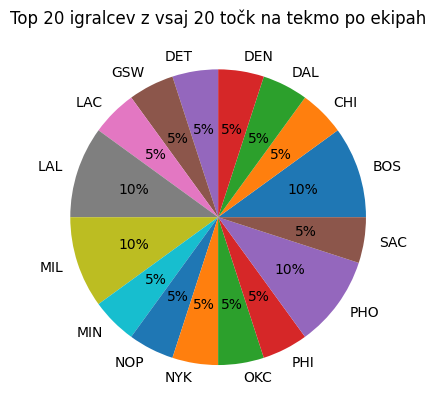

In [13]:
top_scorers.groupby("Team").size().plot.pie(title="Top 20 igralcev z vsaj 20 točk na tekmo po ekipah", autopct="%1.0f%%")

Poglejmo si, kateri so bili igralci z najučinkovitejšo distribucijo podaj, opazovali bomo razmerje med asistencami in izgubljenimi žogami igralcev, 
ki so odigrali vsaj 60 tekem ter imel vsaj 5 asistenc na tekmo.

In [15]:
redni_del_60tekem = redni_del[(redni_del["G"] >= 60) & (redni_del["AST"] >= 5)]
najboljsi_AST_TOV = redni_del_60tekem[["Player", "Team", "AST", "TOV"]].assign(AST_TOV = (redni_del_60tekem["AST"] / redni_del_60tekem["TOV"]).round(1)).sort_values(by="AST_TOV", ascending=False)
najboljsi_AST_TOV.head(15)

,Player,Team,AST,TOV,AST_TOV
157,Tyus Jones,WAS,7.3,1.0,7.3
74,Fred VanVleet,HOU,8.1,1.7,4.8
51,Tyrese Haliburton,IND,10.9,2.3,4.7
167,Mike Conley,MIN,5.9,1.3,4.5
214,Tre Jones,SAS,6.2,1.5,4.1
209,T.J. McConnell,IND,5.5,1.5,3.7
13,Tyrese Maxey,PHI,6.2,1.7,3.6
104,Derrick White,BOS,5.2,1.5,3.5
55,Terry Rozier,2TM,5.6,1.7,3.3
85,James Harden,LAC,8.5,2.6,3.3


Dotaknimo se zdaj starosti igralcev, kakšna je zastopanost posameznih starosti, porazdelitev igralcev glede na točke in starost 
ter povprečja določenih statistik glede na starostne skupine.

Povprečna starost: 25.88


<Axes: title={'center': 'Zastopanost igralcev glede na starost'}, xlabel='Starost', ylabel='Število igralcev'>

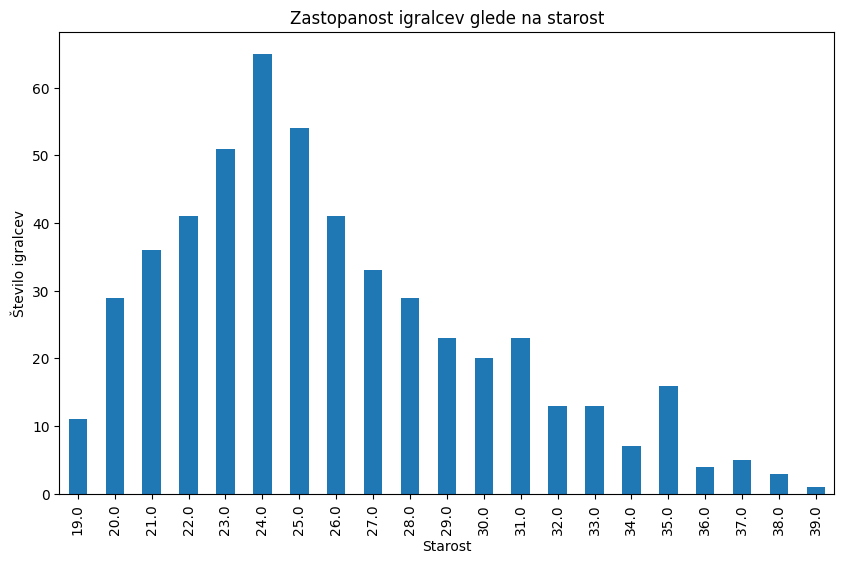

In [16]:
print(f"Povprečna starost: {round(redni_del["Age"].mean(), 2)}")

zastopanost_starosti = redni_del.groupby("Age")
zastopanost_starosti.size().plot.bar(xlabel = "Starost", ylabel = "Število igralcev", title = "Zastopanost igralcev glede na starost", figsize = (10,6))

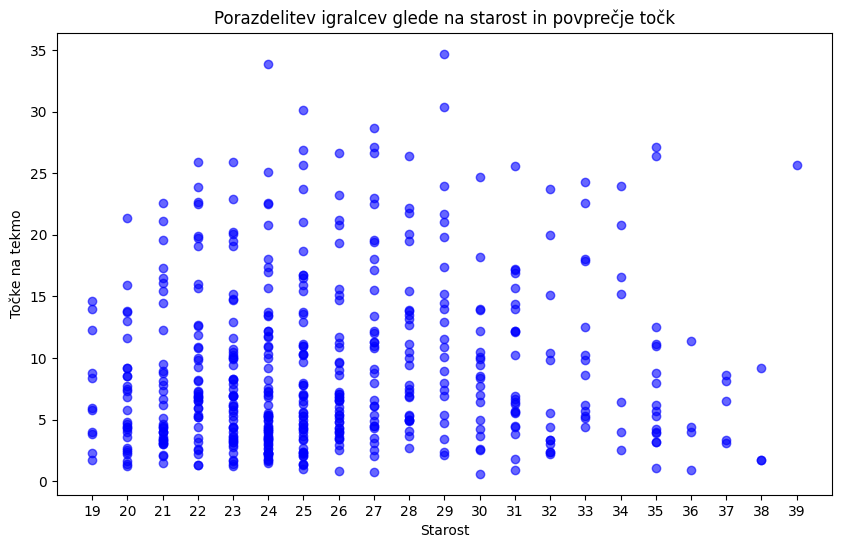

In [17]:
# ustvarimo graf, ki prikazuje igralce glede na starost in povprečje točk na tekmo
plt.figure(figsize=(10,6))
plt.scatter(redni_del["Age"], redni_del["PTS"], color='blue', alpha=0.6)
plt.xlabel("Starost")
plt.ylabel("Točke na tekmo")
plt.title("Porazdelitev igralcev glede na starost in povprečje točk")
plt.xticks(ticks=range(int(redni_del["Age"].min()), int(redni_del["Age"].max())+1))
plt.show()

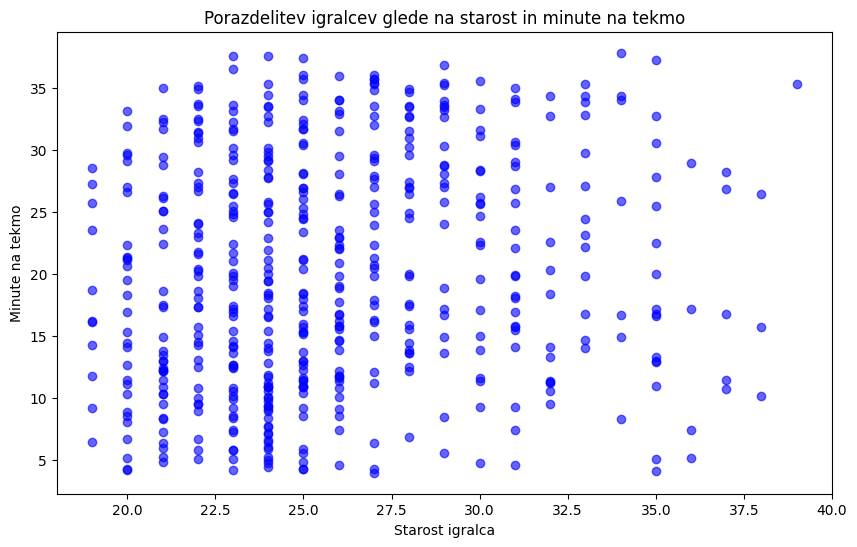

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(redni_del["Age"], redni_del["MP"], alpha=0.6, color="blue")
plt.xlabel("Starost igralca")
plt.ylabel("Minute na tekmo")
plt.title("Porazdelitev igralcev glede na starost in minute na tekmo")
plt.show()

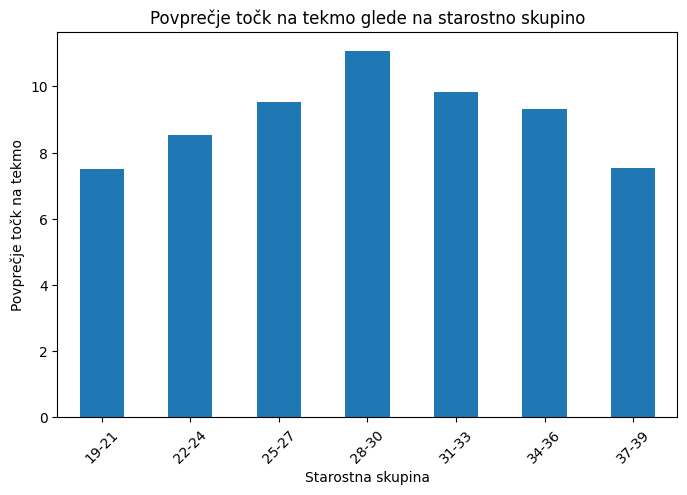

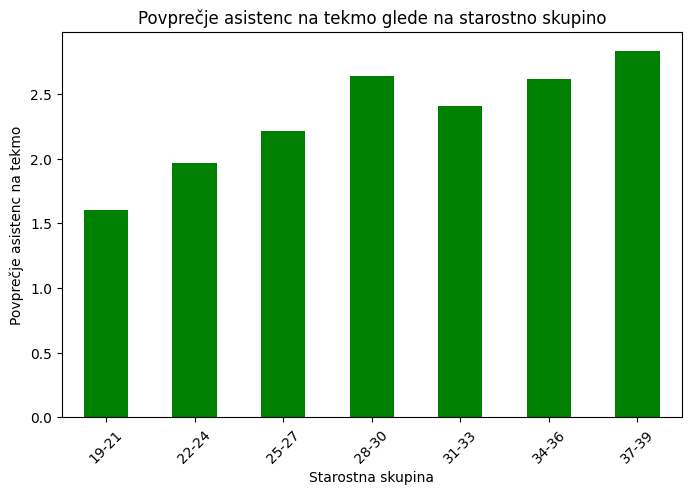

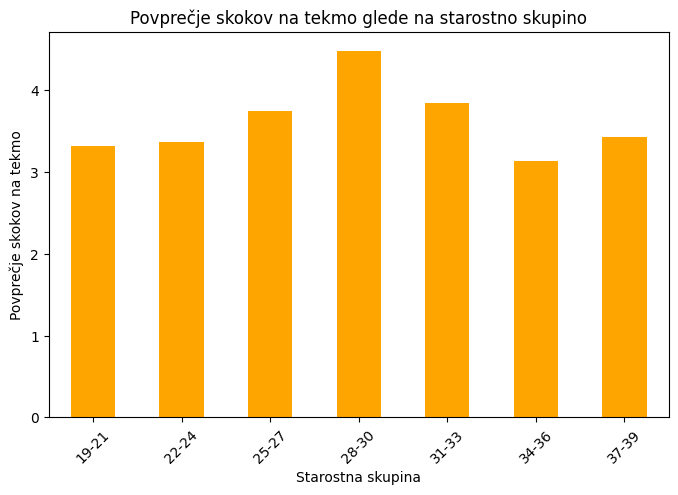

In [18]:
# naredimo starostne skupine in določimo meje
starostne_skupine = ["19-21", "22-24", "25-27", "28-30", "31-33", "34-36", "37-39"]
desne_meje = [18, 21, 24, 27, 30, 33, 36, 39]

igralci_po_starostnih_skupinahPPG = redni_del.groupby(pd.cut(redni_del["Age"], bins = desne_meje, labels = starostne_skupine, right=True), observed=False)["PTS"].mean()
igralci_po_starostnih_skupinahPPG.plot.bar(xlabel = "Starostna skupina", ylabel = "Povprečje točk na tekmo", title = "Povprečje točk na tekmo glede na starostno skupino", figsize = (8,5))
plt.xticks(rotation=45)
plt.show()

igralci_po_starostnih_skupinahAST = redni_del.groupby(pd.cut(redni_del["Age"], bins = desne_meje, labels = starostne_skupine, right=True), observed=False)["AST"].mean()
igralci_po_starostnih_skupinahAST.plot.bar(xlabel = "Starostna skupina", ylabel = "Povprečje asistenc na tekmo", title = "Povprečje asistenc na tekmo glede na starostno skupino", figsize = (8,5), color="green")
plt.xticks(rotation=45)
plt.show()

igralci_po_starostnih_skupinahREB = redni_del.groupby(pd.cut(redni_del["Age"], bins = desne_meje, labels = starostne_skupine, right=True), observed=False)["TRB"].mean()
igralci_po_starostnih_skupinahREB.plot.bar(xlabel = "Starostna skupina", ylabel = "Povprečje skokov na tekmo", title = "Povprečje skokov na tekmo glede na starostno skupino", figsize = (8,5), color="orange")
plt.xticks(rotation=45)
plt.show()

Obravnavajmo še, kako se med seboj razlikujejo oziroma ujemajo igralci glede na igralne pozicije/igralna mesta. V moderni košarki je čedalje več igralcev, ki nimajo stalno določene pozicije, saj so sposobni igrati na več pozicijah, pa vendar vseeno najdemo podobnosti med igralci znotraj enake pozicije.

Za začetek si oglejmo povprečne vrednosti za vse pozicije.

In [21]:
povprecja_pozicij = redni_del.groupby("Pos").mean(numeric_only=True).round(2)
povprecja_pozicij.sort_values(by="PTS", ascending=False)

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,
PG,26.32,48.97,21.48,3.73,8.41,0.43,1.27,3.55,0.34,0.79,2.75,3.82,0.77,0.25,1.39,1.50,10.29
PF,26.39,48.60,20.15,3.46,7.18,0.47,0.94,2.60,0.32,0.72,4.15,1.75,0.61,0.50,1.03,1.60,9.30
SG,25.00,49.72,19.82,3.31,7.48,0.43,1.32,3.57,0.35,0.77,2.62,2.21,0.63,0.28,1.01,1.47,9.17
C,26.57,52.58,19.07,3.42,6.20,0.56,0.38,1.12,0.26,0.70,5.80,1.58,0.54,0.85,1.07,1.97,8.71
SF,25.36,50.95,19.90,3.03,6.72,0.44,1.10,3.13,0.33,0.77,3.24,1.54,0.62,0.34,0.87,1.55,8.26


Prikažimo z grafom vrednosti za točke, skoke, asistence glede na pozicijo.

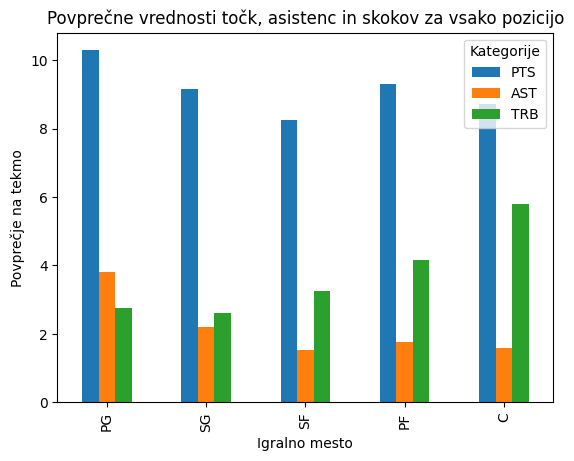

In [22]:
vrstni_red = ["PG", "SG", "SF", "PF", "C"]
povprecja_pozicij= povprecja_pozicij.loc[vrstni_red]

kategorije = ["PTS", "AST", "TRB"]
povprecja_pozicij[kategorije].plot.bar()
plt.xlabel("Igralno mesto")
plt.ylabel("Povprečje na tekmo")
plt.title("Povprečne vrednosti točk, asistenc in skokov za vsako pozicijo")
plt.legend(title="Kategorije")
plt.show()

Opazimo osnovne značilnosti tradicionalnih igralnih mest, branilci (PG in SG) imajo več asistenc na tekmo kot ostale tri pozicije, 
medtem ko imajo višji igralci na poziciji PF in C večje število skokov na tekmo. Kar se pa tiče glede števila točk pa opazimo, 
da so minulo sezono v povprečju največ točk na tekmo dosegli organizatorji igre (PG).

Kakšna pa so povprečja metov iz igre, metov za tri točke in prostih metov glede na igralna mesta igralcev?

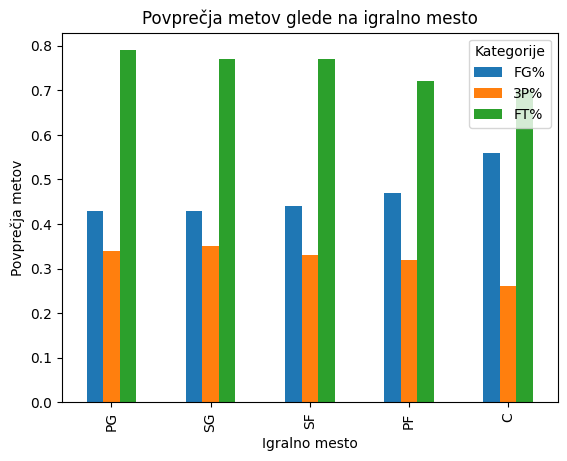

In [23]:
kategorije = ["FG%", "3P%", "FT%"]
povprecja_pozicij[kategorije].plot.bar()
plt.xlabel("Igralno mesto")
plt.ylabel("Povprečja metov")
plt.title("Povprečja metov glede na igralno mesto")
plt.legend(title="Kategorije")
plt.show()

Iz grafa je lepo razvidno, da imajo igralci, ki običajno večino svojih točk dobijo iz bližine koša (PF in C), višji procent meta iz igre (FG%), 
medtem ko imajo branilci načeloma večjo uspešnost pri metu za tri točke, podobno velja za proste mete.

Poglejmo si najuspešnejše posameznike zgornjih treh kategorij za vsako igralno mesto posebej, kjer bomo sešteli vse tri kategorije.

In [49]:
# upoštevajmo igralce z vsaj 40 odigranimi tekmami
redni_del_40tekem = redni_del[redni_del["G"] >= 40].copy()
redni_del_40tekem.loc[:, "Vsota procentov"] = redni_del_40tekem["FG%"] + redni_del_40tekem["3P%"] + redni_del_40tekem["FT%"]
pozicije = ["PG", "SG", "SF", "PF", "C"]

# funkcija za vsako pozicijo izpiše tabelo
top_igralci = pd.DataFrame()
for igralno_mesto in pozicije:
    redni_del_pozicija = redni_del_40tekem[redni_del_40tekem["Pos"] == igralno_mesto]
    top_10 = redni_del_pozicija.sort_values(by="Vsota procentov", ascending=False).head(10)
    top_10 = top_10[["Player", "G", "Pos", "FG%", "3P%", "FT%", "Vsota procentov"]]
    print(f"\n Top 10 igralcev za igralno mesto {igralno_mesto}:\n")
    print(top_10)



 Top 10 igralcev za igralno mesto PG:

                      Player     G Pos    FG%    3P%    FT%  Vsota procentov
167              Mike Conley  76.0  PG  0.457  0.442  0.911            1.810
500            Jacob Gilyard  41.0  PG  0.400  0.405  1.000            1.805
272               Dante Exum  55.0  PG  0.533  0.491  0.779            1.803
10             Stephen Curry  74.0  PG  0.450  0.408  0.923            1.781
3    Shai Gilgeous-Alexander  75.0  PG  0.535  0.353  0.874            1.762
41              Jamal Murray  59.0  PG  0.481  0.425  0.853            1.759
209           T.J. McConnell  71.0  PG  0.556  0.409  0.790            1.755
339            Aaron Holiday  78.0  PG  0.446  0.387  0.921            1.754
144             Jrue Holiday  69.0  PG  0.480  0.429  0.833            1.742
5               Devin Booker  68.0  PG  0.492  0.364  0.886            1.742

 Top 10 igralcev za igralno mesto SG:

                       Player     G Pos    FG%    3P%    FT%  Vsota proce

Two-way players so igralci, ki blestijo po svojem vložku tako v napadu kot tudi v obrambi. Čeprav je pogosto take igralce težko na hitro prepoznati iz statistik igralcev, 
pa vseeno za njih v splošnem velja, da imajo "dobra" popvprečja za kategorije iz povprečja točk, ukradenih žog ter blokad. Poglejmo si nekaj takih igralcev.

V letošnji sezoni so bili glavni kandidati za nagrado MVP (Most Valuable Players): Joel, Embiid, Luka Dončić, Nikola Jokić, SGA... Primerjajmo njihove statistike. radar plot